## FEATURE TRANSFORMATION :

### WHY DO WE NEED FEATURE TRANSFORMATION TECHNIQUES ?

Oftentimes, we have datasets in which different columns have different units – like one column can be in kilograms, while another column can be in centimeters. Furthermore, we can have columns like income which can range from 20,000 to 100,000, and even more; while an age column which can range from 0 to 100(at the most). Thus, Income is about 1,000 times larger than age.

But how can we be sure that the model treats both these variables equally? When we feed these features to the model as is, there is every chance that the income will influence the result more due to its larger value. But this doesn’t necessarily mean it is more important as a predictor. So, to give importance to both Age, and Income, we need feature scaling.

#### Gradient Descent Based Algorithms:
1. "Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled."

2. "Having features on a similar scale can help the gradient descent converge more quickly towards the minima."
3. "To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model."
       
#### Tree-based algorithms, on the other hand, are fairly insensitive to the scale of the features.

#### Distance-Based Algorithms
1. Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

2. Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

### TYPES OF TRANSFORMATION TECHNIQUES:
    0. STANDARDIZATION
    1. MIN MAX or NORMALIZATION
    2. ROBUST OR IQR TRANSFORMATION
    3. GAUSSIAN TRANSFORMATION
        a. Log Transformation
        b. Reciprocal Transformation
        c. Standard Scaler
        d. Square Root Transformation 
        e. Exponential Trnasformation 
        f. Box Cox Transformation

### -------------------------------------------------------------------------------------------------------------------------------------------------------------

### 1. STANDARDIZATION

Standardization is scaling technique where the values are centered around the mean with a unit standard deviation. This means that the mean of the attribute becomes zero and the resultant distribution has a unit standard deviation.

#### NORMALIZATION vs. STANDARDIZATION:

1. Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

2. Standardization, on the other hand, can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Also, unlike normalization, standardization does not have a bounding range. So, even if you have outliers in your data, they will not be affected by standardization.

##### You can always start by fitting your model to raw, normalized and standardized data and compare the performance for best results.

##### It is a good practice to fit the scaler on the training data and then use it to transform the testing data. This would avoid any data leakage during the model testing process. Also, the scaling of target values is generally not required.

In [5]:
import pandas as pd
df=pd.read_csv(r'C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
### impute null values:

df['Age'].fillna(df.Age.median(), inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [9]:
#### standarisation: We use the Standardscaler from sklearn library

from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

#### fit vs fit_transform?
1. with machine learning algorithms we use "FIT"
2. when we have to train the model and then want to change the data we use "FIT_TRANSFORM"

In [13]:
## THE TRANSFORMATION IS DONE ALWAYS FEATURE WISE NOT AT RANDOM:
pd.DataFrame(df_scaled).head()

,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.44643272, -1.32675851, -1.2070843 , -1.08741009,
        -0.96773588, -0.84806167, -0.72838747, -0.60871326, -0.48903905,
        -0.36936484, -0.24969063, -0.13001642, -0.01034222,  0.10933199,
         0.2290062 ,  0.34868041,  0.46835462,  0.58802883,  0.70770304,
         0.82737724]),
 <a list of 20 Patch objects>)

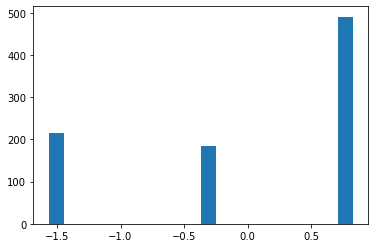

In [15]:
plt.hist(df_scaled[:,1],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([-2.22415608, -1.91837055, -1.61258503, -1.3067995 , -1.00101397,
        -0.69522845, -0.38944292, -0.08365739,  0.22212813,  0.52791366,
         0.83369919,  1.13948471,  1.44527024,  1.75105577,  2.05684129,
         2.36262682,  2.66841235,  2.97419787,  3.2799834 ,  3.58576892,
         3.89155445]),
 <a list of 20 Patch objects>)

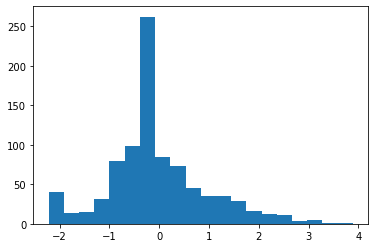

In [16]:
plt.hist(df_scaled[:,2],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.13264224,  0.38313716,  0.89891657,  1.41469598,
         1.93047539,  2.4462548 ,  2.96203421,  3.47781362,  3.99359303,
         4.50937244,  5.02515184,  5.54093125,  6.05671066,  6.57249007,
         7.08826948,  7.60404889,  8.1198283 ,  8.63560771,  9.15138712,
         9.66716653]),
 <a list of 20 Patch objects>)

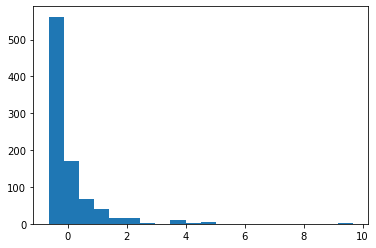

In [17]:
plt.hist(df_scaled[:,3],bins=20)

### 2. MIN-MAX SCALING / NORMALIZATION:

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [18]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

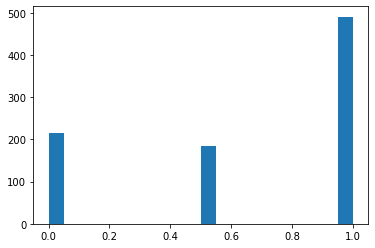

In [19]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([ 40.,  14.,  15.,  31.,  79.,  98., 262.,  84.,  73.,  45.,  35.,
         35.,  29.,  16.,  13.,  11.,   4.,   5.,   1.,   1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

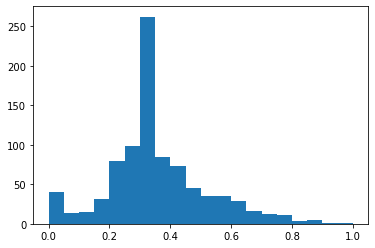

In [20]:
plt.hist(df_minmax['Age'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

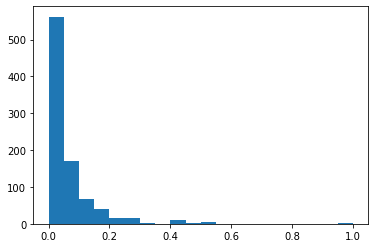

In [21]:
plt.hist(df_minmax['Fare'],bins=20)